In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1CDPQSqpI7OjNIgOERWaI-BlQMI6vjzb9

You should store this file in Drive for use in this Colab notebook.

#### Load the data

In [3]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('./diagnosis.csv')
dataset = pd_dat.values

In [4]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [5]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

#### Build the model

In [6]:
# Build the input layers
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras import Model


shape_inputs = (1,)
temperature = Input(shape = shape_inputs, name = "temp")
nausea_occurence = Input(shape = shape_inputs, name = "nocc")
lumbar_pain = Input(shape = shape_inputs, name = "lumbp")
urine_pushing = Input(shape = shape_inputs, name = "up")
micturition_pains = Input(shape = shape_inputs, name = "mict")
bis = Input(shape = shape_inputs, name = "bis")

In [11]:
# Create a list of all the inputs
list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis]

In [12]:
x = Concatenate()(list_inputs)
# Use a logistic regression classifier for disease prediction
inflammation_pred = Dense(1, activation = "sigmoid", name = "inflam")(x)
nephritis_pred = Dense(1, activation = "sigmoid", name = "nephr")(x)

In [13]:
# Create a list of all the outputs
list_outputs = [inflammation_pred, nephritis_pred]

In [16]:
# Create the model object
model = Model(inputs = list_inputs, outputs = list_outputs)

#### Plot the model

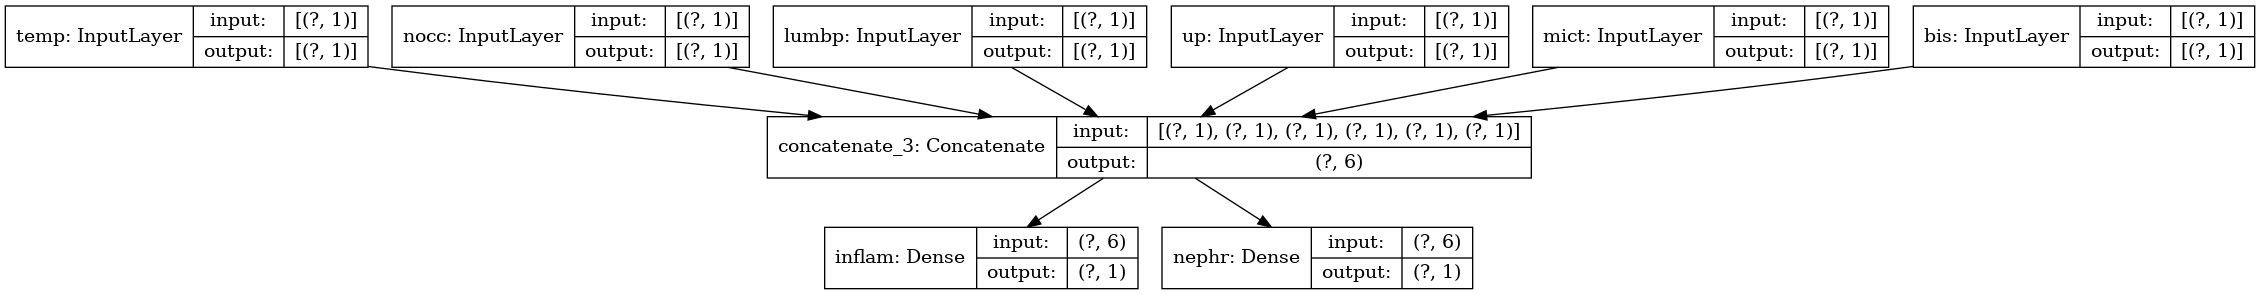

In [17]:
# Display the multiple input/output model
tf.keras.utils.plot_model(model,"multi_input_output_model.png", show_shapes=True)

#### Compile the model

In [18]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3), loss =["binary_crossentropy","binary_crossentropy"], loss_weights=[.5,.5]  , metrics=["accuracy"])

#### Fit the model 

In [19]:
# Define training inputs and outputs
inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lumbp': lumbp_train,
                'up': up_train, 'mict': mict_train, 'bis': bis_train}

outputs_train = {'inflam': inflam_train, 'nephr': nephr_train}

In [20]:
# Train the model
history = model.fit(inputs_train, outputs_train,epochs=1000)

Epoch 1/1000
3/3 [==============================] - 0s 4ms/step - loss: 12.8210 - inflam_loss: 15.3235 - nephr_loss: 10.3184 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.4125
Epoch 2/1000
3/3 [==============================] - 0s 3ms/step - loss: 12.6798 - inflam_loss: 15.1867 - nephr_loss: 10.1729 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.4125
Epoch 3/1000
3/3 [==============================] - 0s 5ms/step - loss: 12.5795 - inflam_loss: 15.0876 - nephr_loss: 10.0714 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.4125
Epoch 4/1000
3/3 [==============================] - 0s 4ms/step - loss: 12.4912 - inflam_loss: 15.0049 - nephr_loss: 9.9775 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.4125
Epoch 5/1000
3/3 [==============================] - 0s 3ms/step - loss: 12.4102 - inflam_loss: 14.9278 - nephr_loss: 9.8926 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.4125
Epoch 6/1000
3/3 [==============================] - 0s 3ms/step - loss: 12.3352 - inflam_loss: 14.8562 - nephr_loss: 9.814

3/3 [==============================] - 0s 2ms/step - loss: 9.5587 - inflam_loss: 12.2016 - nephr_loss: 6.9157 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.4125
Epoch 48/1000
3/3 [==============================] - 0s 3ms/step - loss: 9.4915 - inflam_loss: 12.1381 - nephr_loss: 6.8448 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.4125
Epoch 49/1000
3/3 [==============================] - 0s 4ms/step - loss: 9.4236 - inflam_loss: 12.0721 - nephr_loss: 6.7751 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.4125
Epoch 50/1000
3/3 [==============================] - 0s 3ms/step - loss: 9.3571 - inflam_loss: 12.0081 - nephr_loss: 6.7060 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.4125
Epoch 51/1000
3/3 [==============================] - 0s 3ms/step - loss: 9.2918 - inflam_loss: 11.9444 - nephr_loss: 6.6392 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.4125
Epoch 52/1000
3/3 [==============================] - 0s 3ms/step - loss: 9.2245 - inflam_loss: 11.8787 - nephr_loss: 6.5703 - inflam_accura

3/3 [==============================] - 0s 3ms/step - loss: 6.4676 - inflam_loss: 9.2439 - nephr_loss: 3.6913 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.4125
Epoch 94/1000
3/3 [==============================] - 0s 3ms/step - loss: 6.4012 - inflam_loss: 9.1821 - nephr_loss: 3.6202 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.4125
Epoch 95/1000
3/3 [==============================] - 0s 3ms/step - loss: 6.3346 - inflam_loss: 9.1200 - nephr_loss: 3.5493 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.4125
Epoch 96/1000
3/3 [==============================] - 0s 3ms/step - loss: 6.2684 - inflam_loss: 9.0574 - nephr_loss: 3.4794 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.4125
Epoch 97/1000
3/3 [==============================] - 0s 3ms/step - loss: 6.1997 - inflam_loss: 8.9921 - nephr_loss: 3.4072 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.4125
Epoch 98/1000
3/3 [==============================] - 0s 4ms/step - loss: 6.1342 - inflam_loss: 8.9268 - nephr_loss: 3.3415 - inflam_accuracy: 0.

3/3 [==============================] - 0s 3ms/step - loss: 3.7119 - inflam_loss: 6.2850 - nephr_loss: 1.1387 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.1500
Epoch 140/1000
3/3 [==============================] - 0s 3ms/step - loss: 3.6720 - inflam_loss: 6.2248 - nephr_loss: 1.1193 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.1500
Epoch 141/1000
3/3 [==============================] - 0s 3ms/step - loss: 3.6299 - inflam_loss: 6.1588 - nephr_loss: 1.1010 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.1500
Epoch 142/1000
3/3 [==============================] - 0s 4ms/step - loss: 3.5913 - inflam_loss: 6.0963 - nephr_loss: 1.0862 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.1500
Epoch 143/1000
3/3 [==============================] - 0s 3ms/step - loss: 3.5561 - inflam_loss: 6.0359 - nephr_loss: 1.0764 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.1500
Epoch 144/1000
3/3 [==============================] - 0s 3ms/step - loss: 3.5186 - inflam_loss: 5.9712 - nephr_loss: 1.0660 - inflam_accurac

3/3 [==============================] - 0s 4ms/step - loss: 2.1422 - inflam_loss: 3.3266 - nephr_loss: 0.9579 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.3375
Epoch 186/1000
3/3 [==============================] - 0s 3ms/step - loss: 2.1096 - inflam_loss: 3.2622 - nephr_loss: 0.9569 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.3375
Epoch 187/1000
3/3 [==============================] - 0s 3ms/step - loss: 2.0764 - inflam_loss: 3.1992 - nephr_loss: 0.9536 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.3375
Epoch 188/1000
3/3 [==============================] - 0s 4ms/step - loss: 2.0434 - inflam_loss: 3.1327 - nephr_loss: 0.9541 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.3375
Epoch 189/1000
3/3 [==============================] - 0s 3ms/step - loss: 2.0099 - inflam_loss: 3.0690 - nephr_loss: 0.9508 - inflam_accuracy: 0.4875 - nephr_accuracy: 0.3375
Epoch 190/1000
3/3 [==============================] - 0s 3ms/step - loss: 1.9785 - inflam_loss: 3.0083 - nephr_loss: 0.9488 - inflam_accurac

3/3 [==============================] - 0s 4ms/step - loss: 0.8133 - inflam_loss: 0.7386 - nephr_loss: 0.8881 - inflam_accuracy: 0.5875 - nephr_accuracy: 0.4125
Epoch 232/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.8004 - inflam_loss: 0.7080 - nephr_loss: 0.8929 - inflam_accuracy: 0.6000 - nephr_accuracy: 0.4125
Epoch 233/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.7828 - inflam_loss: 0.6794 - nephr_loss: 0.8862 - inflam_accuracy: 0.6625 - nephr_accuracy: 0.4125
Epoch 234/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.7703 - inflam_loss: 0.6556 - nephr_loss: 0.8850 - inflam_accuracy: 0.6625 - nephr_accuracy: 0.4125
Epoch 235/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.7592 - inflam_loss: 0.6325 - nephr_loss: 0.8859 - inflam_accuracy: 0.6625 - nephr_accuracy: 0.4125
Epoch 236/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.7461 - inflam_loss: 0.6115 - nephr_loss: 0.8807 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.6512 - inflam_loss: 0.4785 - nephr_loss: 0.8239 - inflam_accuracy: 0.8000 - nephr_accuracy: 0.4125
Epoch 278/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6492 - inflam_loss: 0.4766 - nephr_loss: 0.8219 - inflam_accuracy: 0.8000 - nephr_accuracy: 0.4125
Epoch 279/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6490 - inflam_loss: 0.4757 - nephr_loss: 0.8223 - inflam_accuracy: 0.8250 - nephr_accuracy: 0.4125
Epoch 280/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6508 - inflam_loss: 0.4762 - nephr_loss: 0.8254 - inflam_accuracy: 0.8125 - nephr_accuracy: 0.4125
Epoch 281/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6462 - inflam_loss: 0.4733 - nephr_loss: 0.8190 - inflam_accuracy: 0.8000 - nephr_accuracy: 0.4125
Epoch 282/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6442 - inflam_loss: 0.4721 - nephr_loss: 0.8164 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.6007 - inflam_loss: 0.4381 - nephr_loss: 0.7633 - inflam_accuracy: 0.8625 - nephr_accuracy: 0.4125
Epoch 324/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6022 - inflam_loss: 0.4394 - nephr_loss: 0.7651 - inflam_accuracy: 0.8500 - nephr_accuracy: 0.4750
Epoch 325/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5979 - inflam_loss: 0.4347 - nephr_loss: 0.7612 - inflam_accuracy: 0.8625 - nephr_accuracy: 0.4500
Epoch 326/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5969 - inflam_loss: 0.4339 - nephr_loss: 0.7599 - inflam_accuracy: 0.8625 - nephr_accuracy: 0.4875
Epoch 327/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5974 - inflam_loss: 0.4333 - nephr_loss: 0.7616 - inflam_accuracy: 0.8625 - nephr_accuracy: 0.4375
Epoch 328/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5946 - inflam_loss: 0.4323 - nephr_loss: 0.7570 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.5547 - inflam_loss: 0.4004 - nephr_loss: 0.7090 - inflam_accuracy: 0.8625 - nephr_accuracy: 0.5750
Epoch 370/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5537 - inflam_loss: 0.3996 - nephr_loss: 0.7078 - inflam_accuracy: 0.8625 - nephr_accuracy: 0.5750
Epoch 371/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5526 - inflam_loss: 0.3987 - nephr_loss: 0.7064 - inflam_accuracy: 0.8625 - nephr_accuracy: 0.5750
Epoch 372/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5521 - inflam_loss: 0.3985 - nephr_loss: 0.7058 - inflam_accuracy: 0.8625 - nephr_accuracy: 0.5625
Epoch 373/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5513 - inflam_loss: 0.3975 - nephr_loss: 0.7052 - inflam_accuracy: 0.8625 - nephr_accuracy: 0.5500
Epoch 374/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5495 - inflam_loss: 0.3961 - nephr_loss: 0.7029 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.5119 - inflam_loss: 0.3673 - nephr_loss: 0.6566 - inflam_accuracy: 0.8625 - nephr_accuracy: 0.6125
Epoch 416/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5116 - inflam_loss: 0.3662 - nephr_loss: 0.6571 - inflam_accuracy: 0.8625 - nephr_accuracy: 0.5875
Epoch 417/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5098 - inflam_loss: 0.3659 - nephr_loss: 0.6537 - inflam_accuracy: 0.8625 - nephr_accuracy: 0.6750
Epoch 418/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5087 - inflam_loss: 0.3648 - nephr_loss: 0.6526 - inflam_accuracy: 0.8625 - nephr_accuracy: 0.6750
Epoch 419/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5089 - inflam_loss: 0.3642 - nephr_loss: 0.6537 - inflam_accuracy: 0.8625 - nephr_accuracy: 0.6750
Epoch 420/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5091 - inflam_loss: 0.3663 - nephr_loss: 0.6520 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.4745 - inflam_loss: 0.3378 - nephr_loss: 0.6112 - inflam_accuracy: 0.9125 - nephr_accuracy: 0.8375
Epoch 462/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4722 - inflam_loss: 0.3374 - nephr_loss: 0.6071 - inflam_accuracy: 0.9125 - nephr_accuracy: 0.8375
Epoch 463/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4708 - inflam_loss: 0.3361 - nephr_loss: 0.6055 - inflam_accuracy: 0.9000 - nephr_accuracy: 0.8375
Epoch 464/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4702 - inflam_loss: 0.3360 - nephr_loss: 0.6044 - inflam_accuracy: 0.8750 - nephr_accuracy: 0.8375
Epoch 465/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4700 - inflam_loss: 0.3362 - nephr_loss: 0.6038 - inflam_accuracy: 0.9000 - nephr_accuracy: 0.8375
Epoch 466/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4684 - inflam_loss: 0.3341 - nephr_loss: 0.6027 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.4372 - inflam_loss: 0.3107 - nephr_loss: 0.5638 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 508/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4373 - inflam_loss: 0.3114 - nephr_loss: 0.5632 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 509/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4358 - inflam_loss: 0.3096 - nephr_loss: 0.5620 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 510/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4347 - inflam_loss: 0.3092 - nephr_loss: 0.5602 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 511/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4349 - inflam_loss: 0.3102 - nephr_loss: 0.5595 - inflam_accuracy: 0.9000 - nephr_accuracy: 0.8375
Epoch 512/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4339 - inflam_loss: 0.3087 - nephr_loss: 0.5590 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.4052 - inflam_loss: 0.2873 - nephr_loss: 0.5231 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 554/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4041 - inflam_loss: 0.2860 - nephr_loss: 0.5223 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 555/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4034 - inflam_loss: 0.2859 - nephr_loss: 0.5208 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 556/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4038 - inflam_loss: 0.2865 - nephr_loss: 0.5210 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 557/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4018 - inflam_loss: 0.2845 - nephr_loss: 0.5191 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 558/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4009 - inflam_loss: 0.2840 - nephr_loss: 0.5178 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.3746 - inflam_loss: 0.2643 - nephr_loss: 0.4849 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 600/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3744 - inflam_loss: 0.2640 - nephr_loss: 0.4849 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 601/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3731 - inflam_loss: 0.2639 - nephr_loss: 0.4823 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 602/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3725 - inflam_loss: 0.2631 - nephr_loss: 0.4818 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 603/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.3722 - inflam_loss: 0.2632 - nephr_loss: 0.4813 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 604/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3725 - inflam_loss: 0.2638 - nephr_loss: 0.4811 - inflam_accurac

3/3 [==============================] - 0s 2ms/step - loss: 0.3489 - inflam_loss: 0.2452 - nephr_loss: 0.4527 - inflam_accuracy: 0.9500 - nephr_accuracy: 0.8375
Epoch 646/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3464 - inflam_loss: 0.2442 - nephr_loss: 0.4486 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 647/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.3461 - inflam_loss: 0.2444 - nephr_loss: 0.4478 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 648/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3460 - inflam_loss: 0.2445 - nephr_loss: 0.4475 - inflam_accuracy: 0.9750 - nephr_accuracy: 0.8375
Epoch 649/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3448 - inflam_loss: 0.2433 - nephr_loss: 0.4463 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.8375
Epoch 650/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3443 - inflam_loss: 0.2426 - nephr_loss: 0.4459 - inflam_accurac

3/3 [==============================] - 0s 4ms/step - loss: 0.3226 - inflam_loss: 0.2272 - nephr_loss: 0.4180 - inflam_accuracy: 0.9750 - nephr_accuracy: 0.8375
Epoch 692/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.3222 - inflam_loss: 0.2269 - nephr_loss: 0.4175 - inflam_accuracy: 0.9750 - nephr_accuracy: 0.8375
Epoch 693/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3222 - inflam_loss: 0.2270 - nephr_loss: 0.4174 - inflam_accuracy: 0.9750 - nephr_accuracy: 0.8375
Epoch 694/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3205 - inflam_loss: 0.2259 - nephr_loss: 0.4151 - inflam_accuracy: 0.9750 - nephr_accuracy: 0.8375
Epoch 695/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3202 - inflam_loss: 0.2258 - nephr_loss: 0.4146 - inflam_accuracy: 0.9750 - nephr_accuracy: 0.8375
Epoch 696/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3198 - inflam_loss: 0.2252 - nephr_loss: 0.4144 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.2993 - inflam_loss: 0.2107 - nephr_loss: 0.3879 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.8750
Epoch 738/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2989 - inflam_loss: 0.2104 - nephr_loss: 0.3873 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.8875
Epoch 739/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2997 - inflam_loss: 0.2112 - nephr_loss: 0.3883 - inflam_accuracy: 0.9750 - nephr_accuracy: 0.9500
Epoch 740/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2998 - inflam_loss: 0.2110 - nephr_loss: 0.3887 - inflam_accuracy: 0.9750 - nephr_accuracy: 0.8625
Epoch 741/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.2981 - inflam_loss: 0.2095 - nephr_loss: 0.3867 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.8375
Epoch 742/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2982 - inflam_loss: 0.2096 - nephr_loss: 0.3868 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.2790 - inflam_loss: 0.1967 - nephr_loss: 0.3614 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 784/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2792 - inflam_loss: 0.1966 - nephr_loss: 0.3619 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 785/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2781 - inflam_loss: 0.1958 - nephr_loss: 0.3604 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 786/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2800 - inflam_loss: 0.1977 - nephr_loss: 0.3624 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 787/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2773 - inflam_loss: 0.1952 - nephr_loss: 0.3593 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 788/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2773 - inflam_loss: 0.1951 - nephr_loss: 0.3595 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.2615 - inflam_loss: 0.1840 - nephr_loss: 0.3389 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 830/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2594 - inflam_loss: 0.1826 - nephr_loss: 0.3361 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 831/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2588 - inflam_loss: 0.1825 - nephr_loss: 0.3352 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 832/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2587 - inflam_loss: 0.1823 - nephr_loss: 0.3350 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 833/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2590 - inflam_loss: 0.1824 - nephr_loss: 0.3355 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 834/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2577 - inflam_loss: 0.1815 - nephr_loss: 0.3339 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.2421 - inflam_loss: 0.1707 - nephr_loss: 0.3135 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 876/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2418 - inflam_loss: 0.1706 - nephr_loss: 0.3130 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 877/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2422 - inflam_loss: 0.1707 - nephr_loss: 0.3136 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 878/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2410 - inflam_loss: 0.1701 - nephr_loss: 0.3119 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 879/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2406 - inflam_loss: 0.1698 - nephr_loss: 0.3114 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 880/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2401 - inflam_loss: 0.1693 - nephr_loss: 0.3109 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.2266 - inflam_loss: 0.1597 - nephr_loss: 0.2934 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 922/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2273 - inflam_loss: 0.1605 - nephr_loss: 0.2941 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 923/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2257 - inflam_loss: 0.1594 - nephr_loss: 0.2919 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 924/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2251 - inflam_loss: 0.1591 - nephr_loss: 0.2912 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 925/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2250 - inflam_loss: 0.1593 - nephr_loss: 0.2907 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 926/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2244 - inflam_loss: 0.1587 - nephr_loss: 0.2902 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.2117 - inflam_loss: 0.1494 - nephr_loss: 0.2740 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 968/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2115 - inflam_loss: 0.1492 - nephr_loss: 0.2739 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 969/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2119 - inflam_loss: 0.1502 - nephr_loss: 0.2736 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 970/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2111 - inflam_loss: 0.1493 - nephr_loss: 0.2728 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 971/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2106 - inflam_loss: 0.1490 - nephr_loss: 0.2722 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 972/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2099 - inflam_loss: 0.1485 - nephr_loss: 0.2714 - inflam_accurac

#### Plot the learning curves

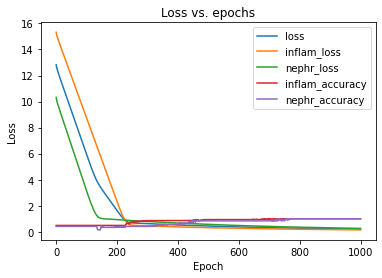

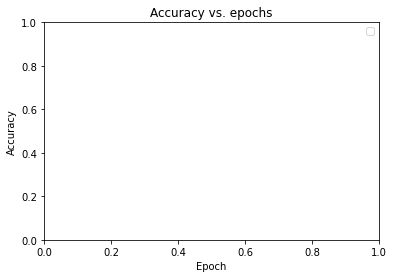

In [21]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [22]:
# Evaluate the model
model.evaluate([temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test],
              [inflam_test, nephr_test])
 

2/2 [==============================] - 0s 2ms/step - loss: 0.2323 - inflam_loss: 0.1768 - nephr_loss: 0.2878 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000


[<tf.Variable 'inflam/kernel:0' shape=(6, 1) dtype=float32, numpy=
 array([[-0.08475002],
        [ 0.9752038 ],
        [-1.6624507 ],
        [ 2.7140138 ],
        [ 2.3934867 ],
        [-0.10174751]], dtype=float32)>,
 <tf.Variable 'inflam/bias:0' shape=(1,) dtype=float32, numpy=array([0.9100975], dtype=float32)>,
 <tf.Variable 'nephr/kernel:0' shape=(6, 1) dtype=float32, numpy=
 array([[-0.03883654],
        [ 2.3708944 ],
        [ 1.2792805 ],
        [ 1.0082537 ],
        [-0.49860534],
        [ 0.7302642 ]], dtype=float32)>,
 <tf.Variable 'nephr/bias:0' shape=(1,) dtype=float32, numpy=array([-0.9588454], dtype=float32)>]

***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [ ]:
import numpy as np

#### Create Variable objects

In [ ]:
# Create Variable objects of different type with tf.Variable

strings = tf.Variable(["Hello world!"], tf.string)
floats  = tf.Variable([3.14159, 2.71828], tf.float64)
ints = tf.Variable([1, 2, 3], tf.int32)
complexs = tf.Variable([25.9 - 7.39j, 1.23 - 4.91j], tf.complex128)

In [ ]:
# Initialise a Variable value
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, Flatten

inputs = Input(shape=(16, 16, 3))
h = Conv2D(32, 3, activation='relu')(inputs)
h = AveragePooling2D(3)(h)
outputs = Flatten()(h)
Model = Model(inputs=inputs, outputs=outputs)

#### Use and modify Variable values

In [ ]:
# Use the value of a Variable

v = tf.Variable(0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.
print(type(w))

In [ ]:
# Increment the value of a Variable
v.assign_add(1)


In [ ]:
# Decrement the value of a Variable
v.assign_sub(2)


#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [ ]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

In [ ]:
# Obtain the value as a numpy array
x.numpy()

In [ ]:
# Create a Tensor of type float32
x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9.]],dtype=tf.float32)
x

In [ ]:
# Create coefficients
coeffs = np.arange(16)

In [ ]:
# Initialise shapes
shape1=[8,2]
shape2=[4,4]
shape3=[2,2,4]


In [ ]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)

#### Useful Tensor operations

In [ ]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=[5,2,8])

In [ ]:
# Get the rank of a Tensor
rank=tf.rank(t)


In [ ]:
# Display the rank

print("rank: ", rank)

In [ ]:
# Reshape a Tensor
t2=tf.reshape(t,shape=(2,2,2,10))


In [ ]:
# Display the new shape

print("t2.shape: ", t2.shape)

In [ ]:
# Create ones, zeros, identity and constant Tensors
ones = tf.ones(shape=(3,4))
zeros = tf.zeros(shape=(3,4))
eye = tf.eye(3)
tensor7 = tf.constant(7.0, shape = (3,4))

In [ ]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)

In [ ]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))

In [ ]:
# Concatentate two Tensors
concat0 = tf.concat([t1,t2],axis = 0)
concat1 = tf.concat([t1,t2],axis = 1)

In [ ]:
# Display the concatenated tensors

print(concat0)
print(concat1)

In [ ]:
# Create a constant Tensor
t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)

In [ ]:
# Expanding the rank of Tensors
t1 = tf.expand_dims(t,axis=1)
t2 = tf.expand_dims(t,axis=2)
t3 = tf.expand_dims(t,axis=3)



In [ ]:
# Display the shapes after tf.expand_dims

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)

In [ ]:
# Squeezing redundant dimensions
tf.squeeze(t1)

In [ ]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)

In [ ]:
# Slicing a Tensor
x = tf.constant([1,2,3,4,5])
x[0:2]

#### Doing maths with Tensors

In [ ]:
# Create two constant Tensors

c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])

In [ ]:
# Matrix multiplication
matmul_cd=tf.matmul(c,d)


In [ ]:
# Display the result

print("\n tf.matmul(c,d):\n", matmul_cd)

In [ ]:
# Elementwise operations
c_times_d = c * d
c_plus_d = c + d
c_minus_d = c - d
c_div_c = c / c

In [ ]:
# Display the results

print("\n c*d:\n", c_times_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/c:\n", c_div_c)

In [ ]:
# Create Tensors
a = tf.constant([[2, 3], [3, 3]])
b = tf.constant([[8, 7], [2, 3]])
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])

In [ ]:
# Absolute value of a Tensor



In [ ]:
# Power of a Tensor



#### Randomly sampled constant tensors

In [ ]:
# Create a Tensor with samples from a Normal distribution
t = tf.random.uniform(shape = (200,100),minval=0.0, maxval=10.0)

In [ ]:
# Create a Tensor with samples from a Uniform distribution

In [ ]:
# Create a Tensor with samples from a Poisson distribution



In [ ]:
# More maths operations

***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [24]:
# Load the VGG19 model
from tensorflow.keras.applications import VGG19
vgg_model  = VGG19()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

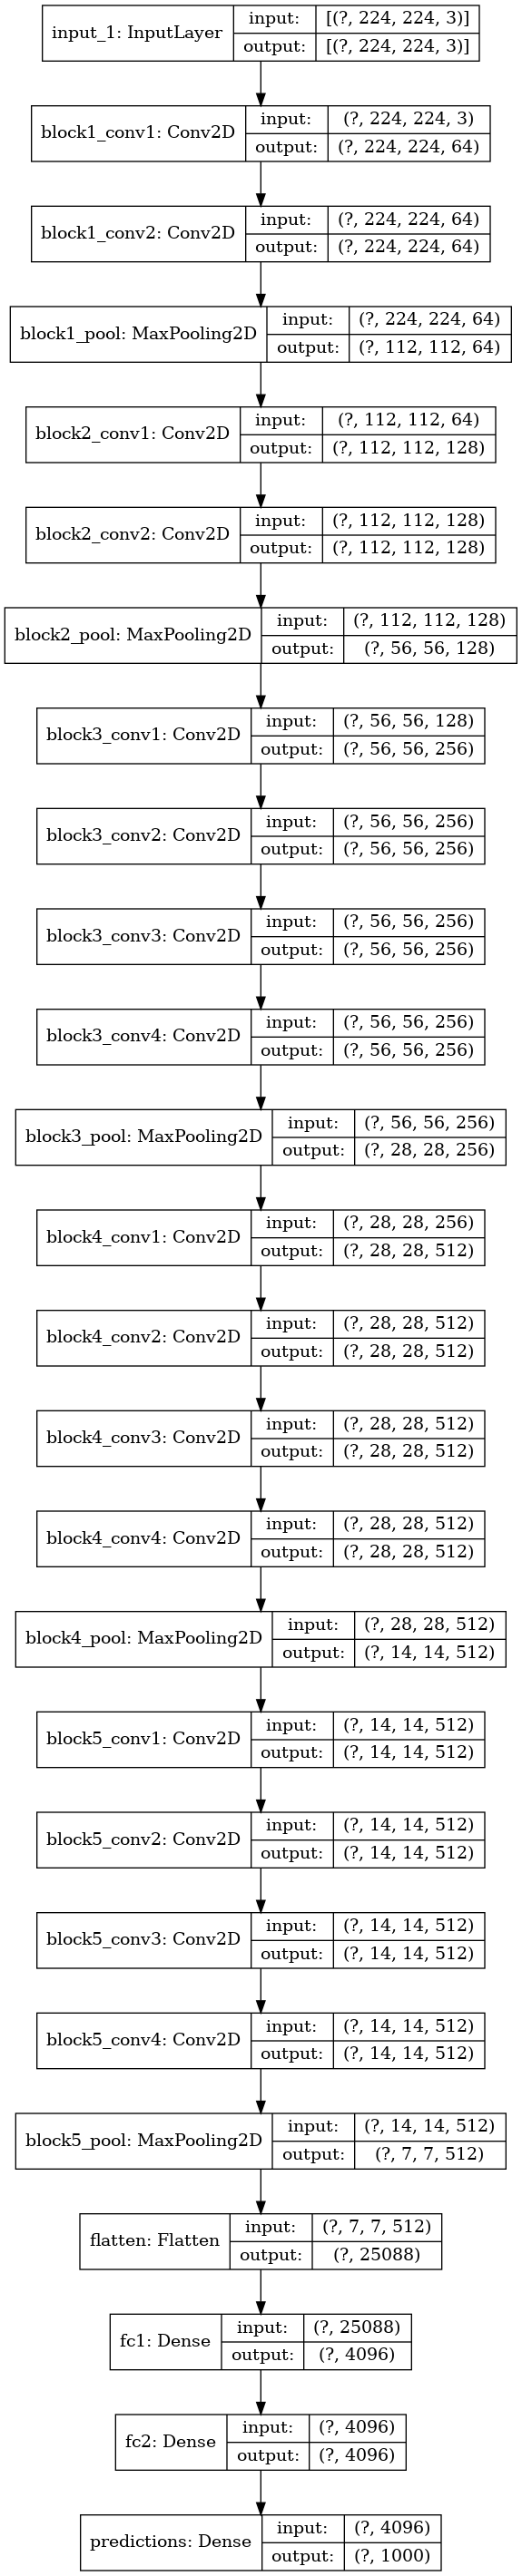

In [25]:
# Get the inputs, layers and display the summary
from tensorflow.keras.utils import plot_model


vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

plot_model(vgg_model,show_shapes=True)

#### Build a model to access the layer outputs

In [26]:
from tensorflow.keras.models import Model

In [27]:
# Build a model that returns the layer outputs

layer_outputs = [layer.output for layer in vgg_layers]
features = Model(inputs= [vgg_input], outputs = layer_outputs)

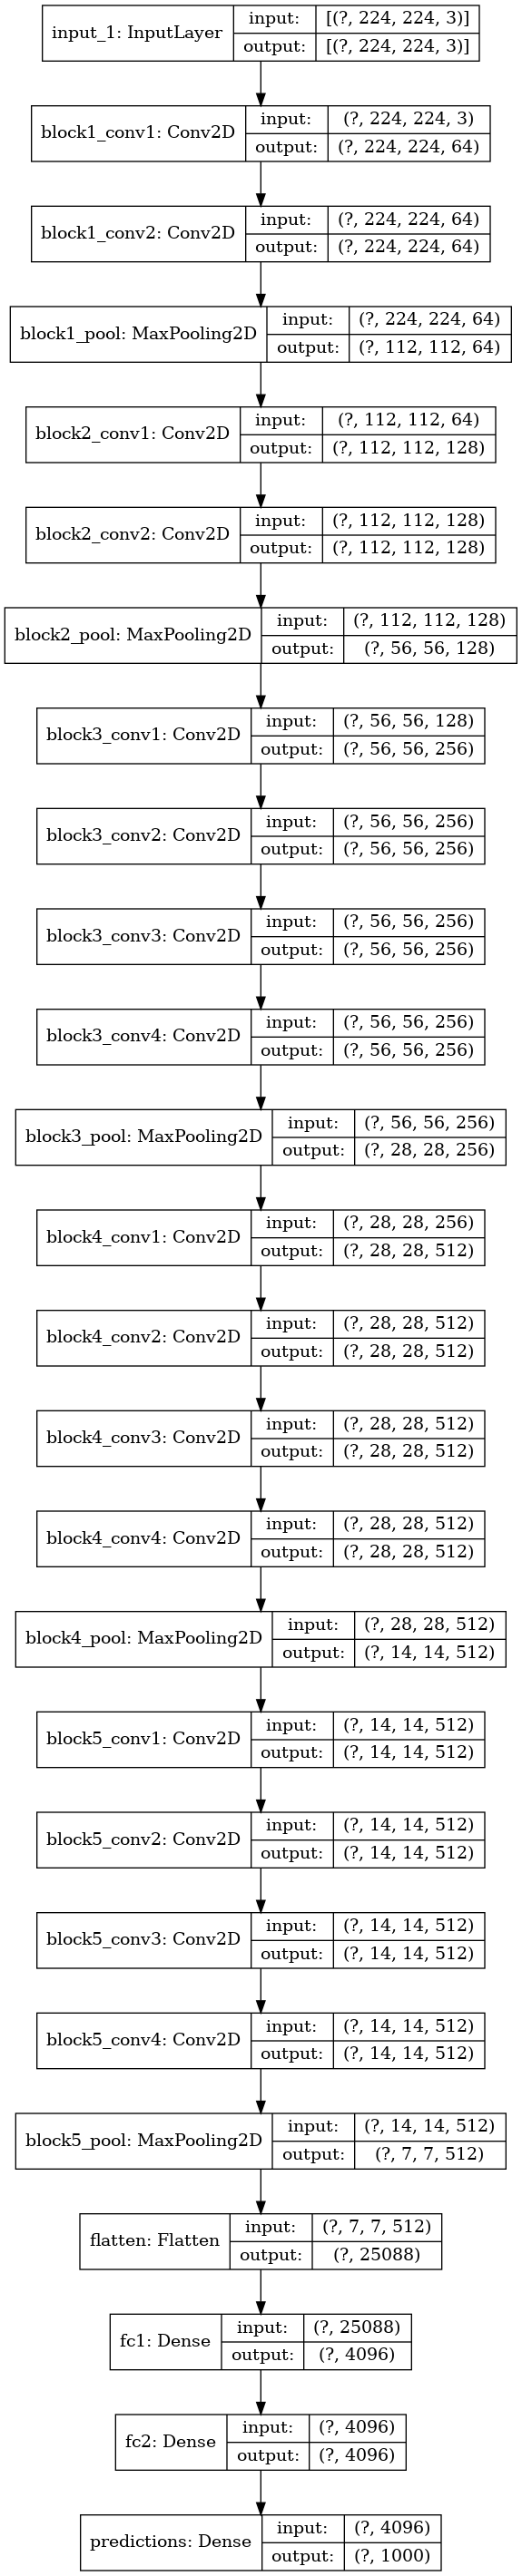

In [28]:
# Plot the model
plot_model(features,show_shapes=True)

In [29]:
# Test the model on a random input
img = np.random.random((1,224,224,3)).astype("float32")

#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

#### Import the picture

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1myXpP8QFvhATqg0bPYhCpVS48_OgAC0L

You should store this file in Drive for use in this Colab notebook.

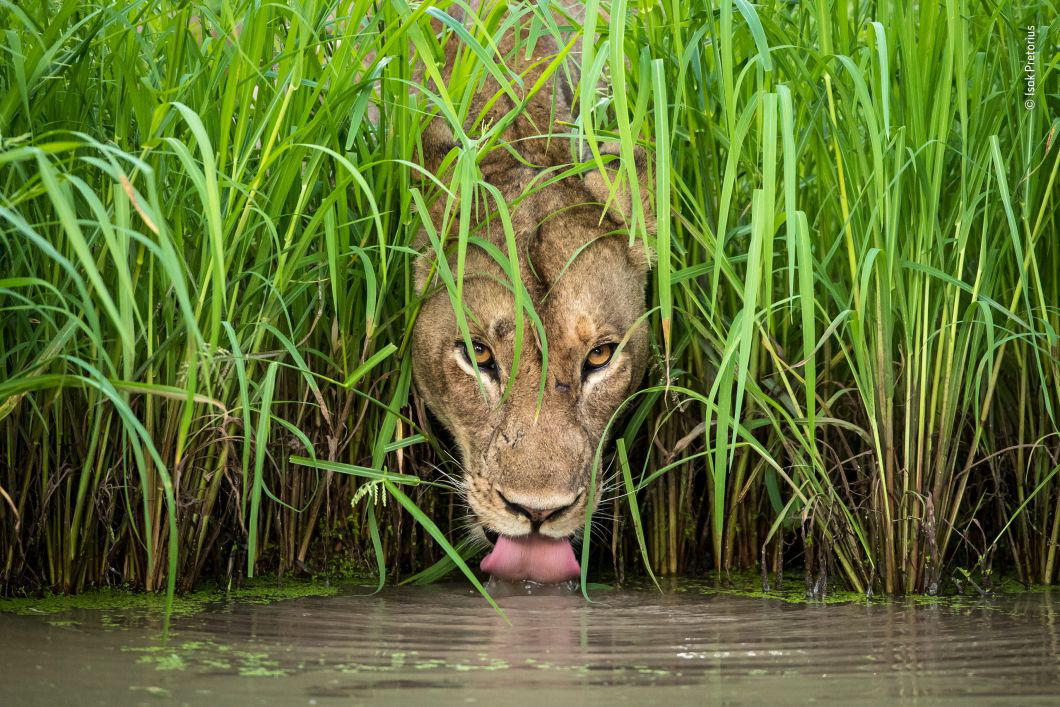

In [30]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open('./cool_cat.jpg'))

#### Visualise network features from the input image

In [31]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = './cool_cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [32]:
# Extract the features
extracted_features= features(x)



 f1.shape (1, 112, 112, 128)


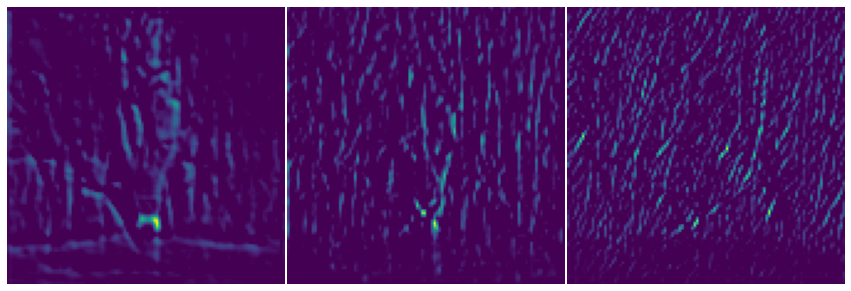

In [35]:
# Visualise the input channels
f1 = extracted_features[5]
print("\n f1.shape", f1.shape)
plt.figure(figsize=(15,15))
imgs = f1[0,:,:,:]
for n in range(3):
    ax = plt.subplot(1,3,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)


 f1.shape (1, 224, 224, 64)


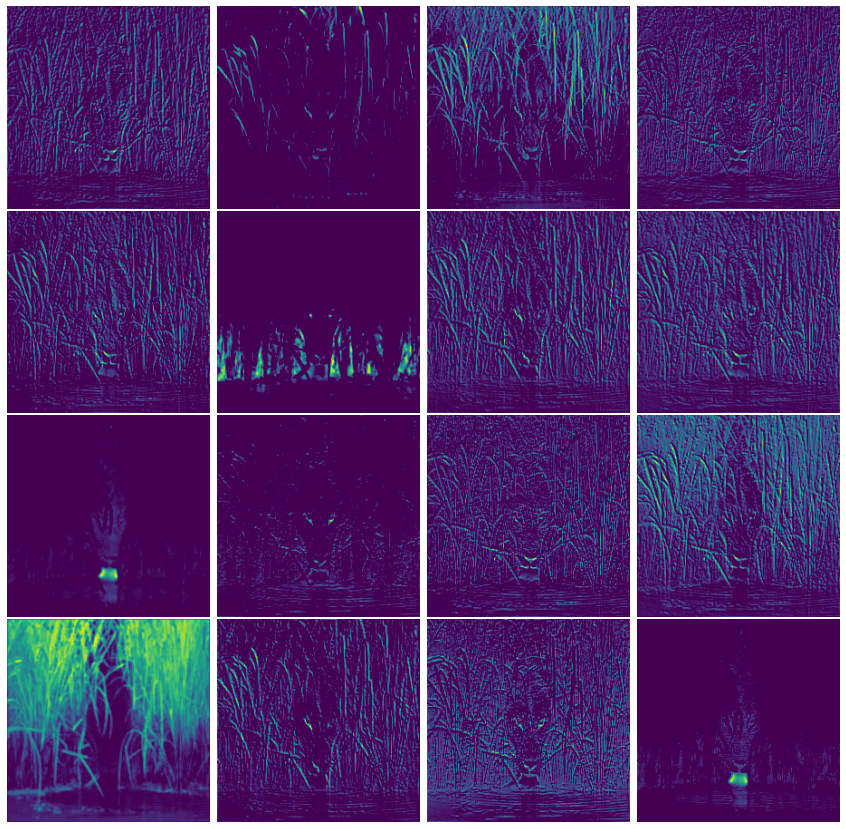

In [36]:
# Visualise some features in the first hidden layer
f1 = extracted_features[1]
print("\n f1.shape", f1.shape)
plt.figure(figsize=(15,15))
imgs = f1[0,:,:,:]
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)


In [37]:
# Build a model to extract features by layer name
from tensorflow.keras.models import Model


extract_block1_pool = Model(inputs = features.input, outputs = features.get_layer("block1_pool").output)
# features = Model(inputs= [vgg_input], outputs = layer_outputs)


 f1.shape (112, 112, 64)


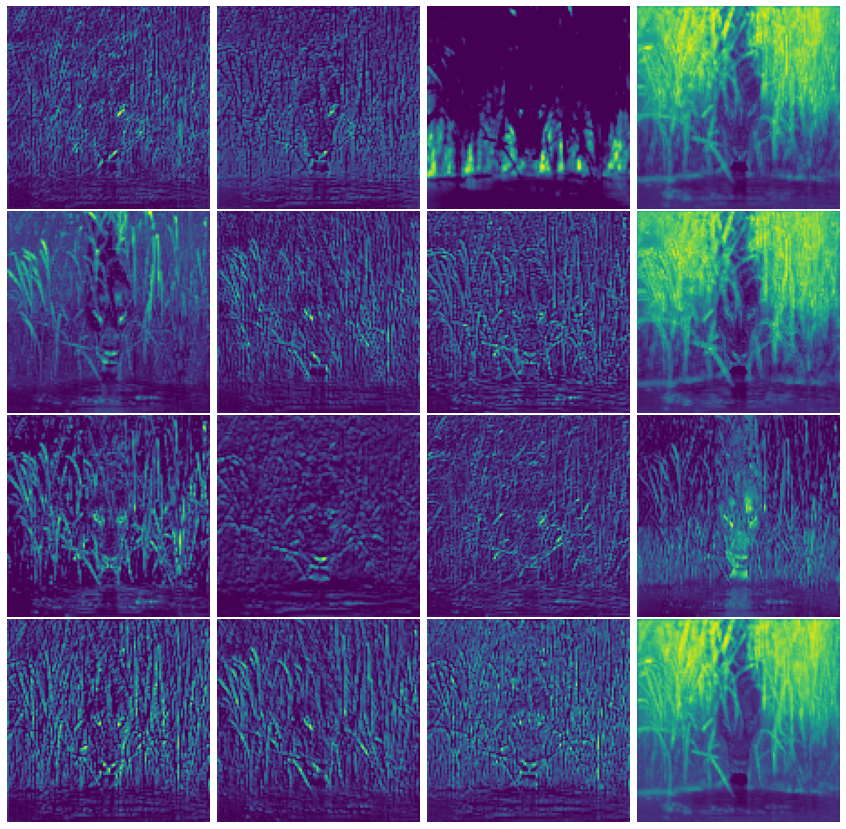

In [38]:
# Visualise some features from the extracted layer output
f1 = extract_block1_pool(x)[0]
print("\n f1.shape", f1.shape)
plt.figure(figsize=(15,15))
imgs = f1[:,:,:]
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [39]:
# Extract features from a layer deeper in the network
extract_block1_pool = Model(inputs = features.input, outputs = features.get_layer("block5_conv4").output)
# features = Model(inputs= [vgg_input], outputs = layer_outputs)


 f1.shape (14, 14, 512)


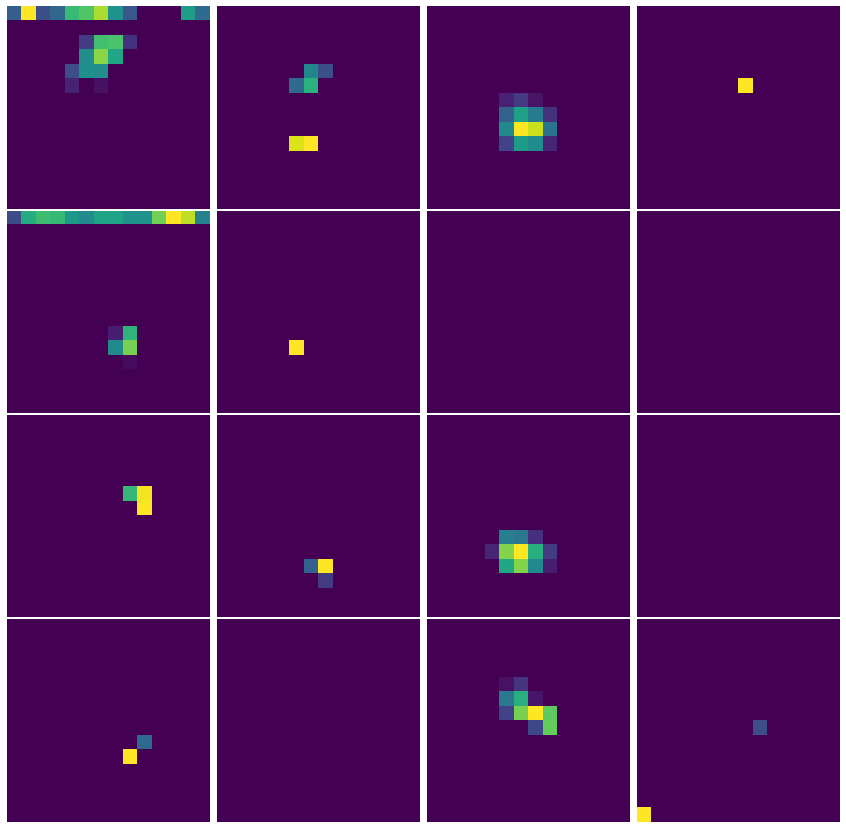

In [40]:
# Visualise some features from the extracted layer output
f5 = extract_block1_pool(x)[0]
print("\n f1.shape", f5.shape)
plt.figure(figsize=(15,15))
imgs = f5[:,:,:]
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)


***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [42]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [43]:
# Display the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [44]:
# Retrieve the weights and biases
import copy

def get_model_weights_bias(model):
    W0_layers = [copy.deepcopy(e.weights[0]) for e in model.layers]
    b0_layers = [copy.deepcopy(e.bias) for e in model.layers]
    return (W0_layers, b0_layers)

    

(W0_layers,b0_layers) = get_model_weights_bias(model)


In [45]:
# Construct a synthetic dataset
x_train = np.random.random((100, 4))
y_train = x_train
x_test = np.random.random((20, 4))
y_test = x_test

In [46]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])
model.fit(x_train, y_train, epochs=50, verbose=False);

In [50]:
# Retrieve weights and biases
(W1_layers,b1_layers) = get_model_weights_bias(model)

tf.Tensor(
[[ 0.14713503 -0.15605843 -0.16376403 -0.14959535]
 [ 0.14276165 -0.0266207  -0.057891   -0.13527362]
 [ 0.02129088 -0.18407378 -0.1885992  -0.08045077]
 [ 0.1604221  -0.14017376 -0.15200564 -0.15664302]], shape=(4, 4), dtype=float32)
Layer 0: bias variation:  0.28121158
tf.Tensor(
[[-0.00312272 -0.17830145]
 [-0.01512417 -0.14851813]
 [-0.01716122 -0.14691326]
 [-0.0138469  -0.14491105]], shape=(4, 2), dtype=float32)
Layer 1: bias variation:  0.16556081
tf.Tensor(
[[ 0.116887   -0.13423556  0.08314168  0.09852284]
 [ 0.15575641  0.00760263 -0.11380923  0.14697771]], shape=(2, 4), dtype=float32)
Layer 2: bias variation:  0.296641


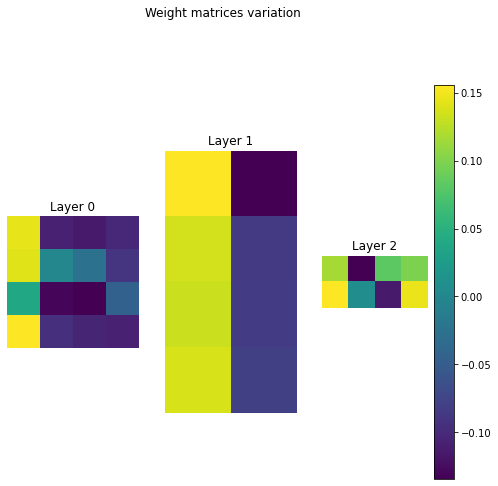

In [51]:
# Plot the variation
def show_weights_bias_diff(W1_layers, W0_layers):
    plt.figure(figsize=(8,8))
    for n in range(3):
        delta_l = W1_layers[n] - W0_layers[n]
        print(delta_l)
        print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
        ax = plt.subplot(1,3,n+1)
        plt.imshow(delta_l)
        plt.title('Layer '+str(n))
        plt.axis('off')
    plt.colorbar()
    plt.suptitle('Weight matrices variation');

show_weights_bias_diff(W1_layers, W0_layers)

#### Freeze layers at build time

In [52]:
# Count the trainable and non trainable variables before the freezing
model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [53]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 Before freezing:
	 Number of trainable variables:  6 
	 Number of non trainable variables:  0


In [54]:
# Build the model
model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones',trainable=False),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])




In [55]:
# Count the trainable and non trainable variables after the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)


In [56]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 After freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [57]:
# Retrieve weights and biases
(W2_layers,b2_layers) = get_model_weights_bias(model)



In [58]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [59]:
# Retrieve weights and biases
(W3_layers,b3_layers) = get_model_weights_bias(model)



tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(4, 4), dtype=float32)
Layer 0: bias variation:  0.28121158
tf.Tensor(
[[-0.25146148 -0.2623127 ]
 [-0.25116676 -0.26217508]
 [-0.25110614 -0.26198906]
 [-0.25114697 -0.26233518]], shape=(4, 2), dtype=float32)
Layer 1: bias variation:  0.16556081
tf.Tensor(
[[ 0.24608274  0.30057174 -0.25655034  0.255419  ]
 [ 0.23266506  0.28553122 -0.24140185  0.23956001]], shape=(2, 4), dtype=float32)
Layer 2: bias variation:  0.296641


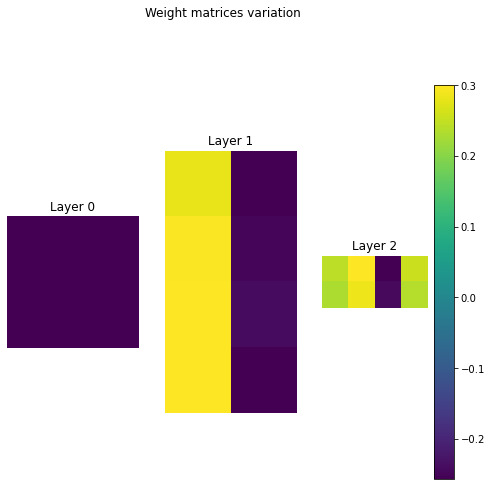

In [60]:
# Plot the variation
show_weights_bias_diff(W3_layers, W2_layers)


#### Freeze layers of a pre-built model

In [ ]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))

In [ ]:
# Freeze the second layer
model.layers[1].trainable=False


In [ ]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))

In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases
(W4_layers,b4_layers) = get_model_weights_bias(model)



In [ ]:
# Plot the variation
show_weights_bias_diff(W4_layers, W3_layers)



In [ ]:
# Define simple tests to time computation speed

import time

def time_matadd(x):
    start = time.time()
    for loop in range(10):
        tf.add(x, x)
    result = time.time()-start
    print("Matrix addition (10 loops): {:0.2f}ms".format(1000*result))


def time_matmul(x):
    start = time.time()
    for loop in range(10):
        tf.matmul(x, x)
    result = time.time()-start
    print("Matrix multiplication (10 loops): {:0.2f}ms".format(1000*result))

In [ ]:
# Force execution on CPU

print("On CPU:")
with tf.device("CPU:0"):
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("CPU:0")
    time_matadd(x)
    time_matmul(x)

In [ ]:
# Force execution on GPU #0 if available

if tf.config.experimental.list_physical_devices("GPU"):
    print("On GPU:")
    with tf.device("GPU:0"): 
        x = tf.random.uniform([1000, 1000])
        assert x.device.endswith("GPU:0")
        time_matadd(x)
        time_matmul(x)